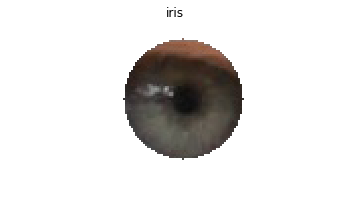

(94, 168, 4)


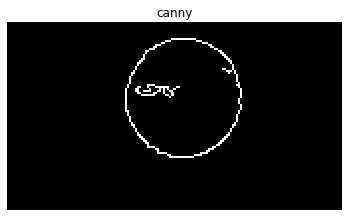

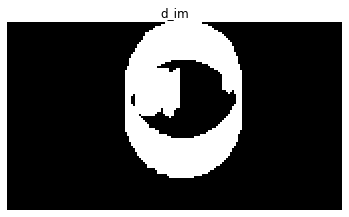

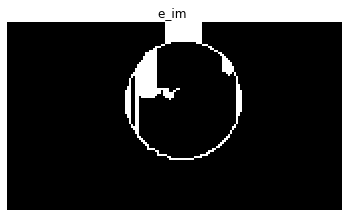

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
import cv2, numpy as np
from M3 import m3Show
from matplotlib import pyplot as plt


iris = cv2.imread("iris.png",cv2.IMREAD_UNCHANGED)
def remove_transparency(source, background_color):
    print(source.shape)
    source_img = cv2.cvtColor(source[:,:,:3], cv2.COLOR_BGR2GRAY)
    source_mask = source[:,:,3]  * (1 / 255.0)

    background_mask = 1.0 - source_mask

    bg_part = (background_color * (1 / 255.0)) * (background_mask)
    source_part = (source_img * (1 / 255.0)) * (source_mask)

    return np.uint8(cv2.addWeighted(bg_part, 255.0, source_part, 255.0, 0.0))


m3Show.imshow(iris, "iris")
iris = remove_transparency(iris, 0)
c = cv2.Canny(iris, 100,200)
m3Show.imshow(c, "canny")

kernel = np.ones((20,1), np.uint8)  # note this is a horizontal kernel
d_im = cv2.dilate(c, kernel, iterations=1)
m3Show.imshow(d_im, "d_im")
e_im = cv2.erode(d_im, kernel, iterations=1) 
m3Show.imshow(e_im, "e_im " )